## Estatísticas de Estabelecimentos Credenciados

Estudo sobre os estabelecimentos credenciados para operações com cartões de crédito e débito, utilizando dados da API do Banco Central (BCB).

Instrumento de periodicidade **trimestral**, com atualização disponibilizada pelo Banco Central do Brasil.

Inclui:

- Quantidade de estabelecimentos credenciados e ativos por bandeira
- Recortes por função do cartão (crédito/débito)
- Análise temporal da evolução dos estabelecimentos

### Parâmetros da API

| Nome       | Tipo    | Título     | Descrição |
|------------|---------|------------|-----------|
| trimestre  | texto   | Trimestre  | Trimestre de referência no formato AAAAQ (A=ano, Q=trimestre 1-4) |
| $format    | texto   | $format    | Tipo de conteúdo que será retornado |
| $select    | texto   | $select    | Propriedades que serão retornadas |
| $filter    | texto   | $filter    | Filtro de seleção de entidades |
| $orderby   | texto   | $orderby   | Propriedades para ordenação das entidades |
| $skip      | inteiro | $skip      | Índice da primeira entidade que será retornada |
| $top       | inteiro | $top       | Número máximo de entidades que serão retornadas |

---

### Dicionário de Dados

| Nome | Tipo | Título | Descrição |
| --- | --- | --- | --- |
| trimestre | texto | Trimestre | Trimestre de referência no formato AAAAQ |
| bandeira | texto | Bandeira | Bandeira do cartão (ex: Visa, Mastercard, etc) |
| funcaoCartao | texto | Função do Cartão | Função do cartão (crédito, débito, etc) |
| qtdEstabCredenciados | inteiro | Quantidade de Estabelecimentos Credenciados | Número total de estabelecimentos credenciados |
| qtdEstabAtivos | inteiro | Quantidade de Estabelecimentos Ativos | Número de estabelecimentos ativos |

---

**Fontes:** 
- [BCB - Estabelecimentos Credenciados](https://dadosabertos.bcb.gov.br/dataset/estatisticas-meios-pagamentos/resource/523552bd-477b-4dcf-93aa-48ffc3c7a41b)

In [7]:
import pandas as pd
import sqlite3

# Conectando ao banco de dados
con = sqlite3.connect('src/datasets/dadosEstabelecimentos.db')
query = "select * from estabelecimentos_credenciados"
df = pd.read_sql(query, con)
con.close()

Primeiro vamos explorar a estrutura do conjunto de dados

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   trimestre             82 non-null     int64 
 1   bandeira              82 non-null     object
 2   funcaoCartao          82 non-null     object
 3   qtdEstabCredenciados  82 non-null     int64 
 4   qtdEstabAtivos        82 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 3.3+ KB


Verificando se existem dados faltantes:

In [9]:
df.isnull().sum()

trimestre               0
bandeira                0
funcaoCartao            0
qtdEstabCredenciados    0
qtdEstabAtivos          0
dtype: int64

Convertendo a coluna trimestre para o formato adequado:

In [13]:
# Função para converter AAAAQ em data
def convert_quarter_to_date(quarter):
    # Convertendo para string primeiro
    quarter_str = str(quarter)
    year = int(quarter_str[:4])
    quarter_num = int(quarter_str[4])
    month = (quarter_num - 1) * 3 + 1  # Converte trimestre em mês inicial
    return pd.Timestamp(year=year, month=month, day=1)

df['trimestre'] = df['trimestre'].apply(convert_quarter_to_date)

Análise da evolução temporal dos estabelecimentos credenciados:

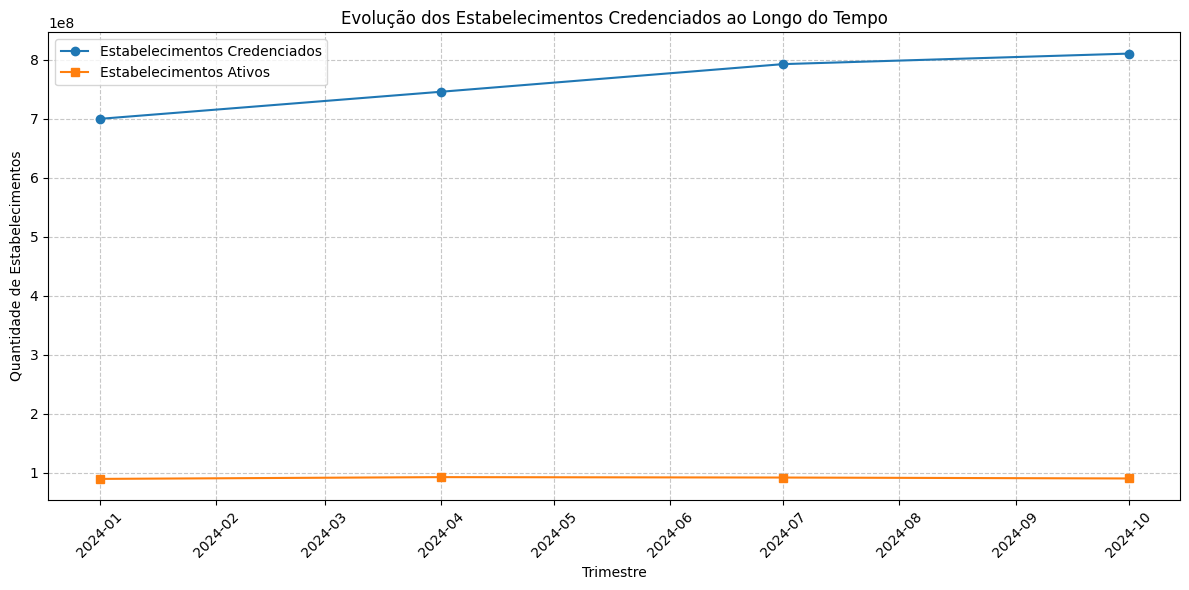

In [14]:
import matplotlib.pyplot as plt

# Agrupando dados por trimestre
evolucao_temporal = df.groupby('trimestre').agg({
    'qtdEstabCredenciados': 'sum',
    'qtdEstabAtivos': 'sum'
}).reset_index()

# Plotando a evolução
plt.figure(figsize=(12, 6))
plt.plot(evolucao_temporal['trimestre'], evolucao_temporal['qtdEstabCredenciados'], 
         label='Estabelecimentos Credenciados', marker='o', color='#1f77b4')
plt.plot(evolucao_temporal['trimestre'], evolucao_temporal['qtdEstabAtivos'], 
         label='Estabelecimentos Ativos', marker='s', color='#ff7f0e')

plt.title('Evolução dos Estabelecimentos Credenciados ao Longo do Tempo')
plt.xlabel('Trimestre')
plt.ylabel('Quantidade de Estabelecimentos')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Análise por bandeira:

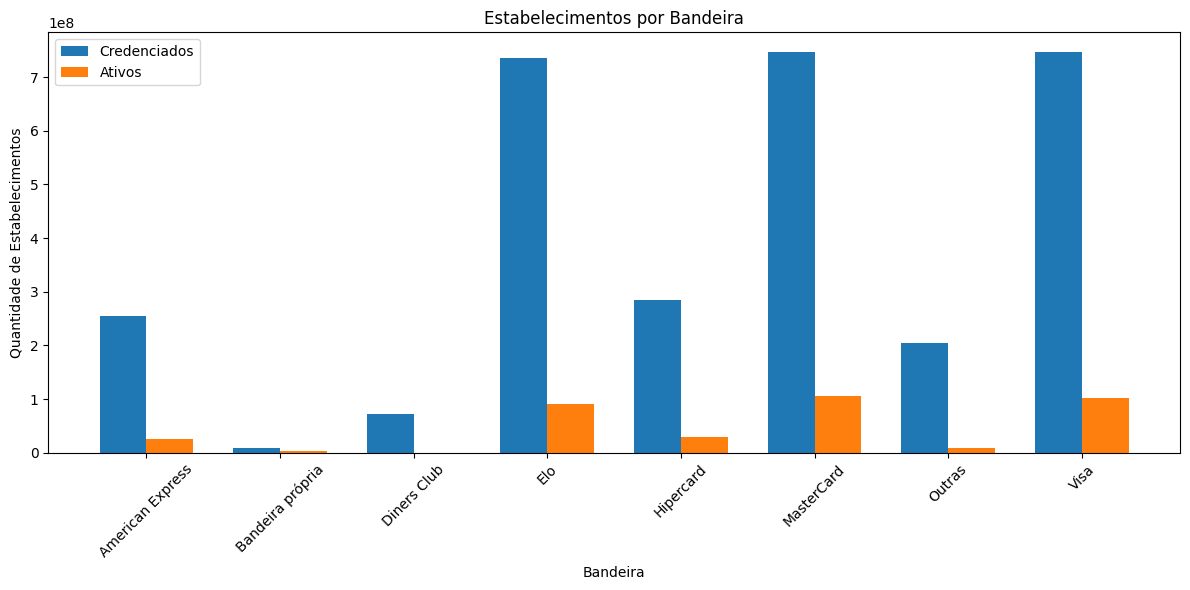

In [ ]:
# Agrupando dados por bandeira
dados_bandeira = df.groupby('bandeira').agg({
    'qtdEstabCredenciados': 'sum',
    'qtdEstabAtivos': 'sum'
}).reset_index()

# Plotando o gráfico de barras
plt.figure(figsize=(12, 6))
x = range(len(dados_bandeira['bandeira']))
width = 0.35

plt.bar([i - width/2 for i in x], dados_bandeira['qtdEstabCredenciados'], 
        width, label='Credenciados')
plt.bar([i + width/2 for i in x], dados_bandeira['qtdEstabAtivos'], 
        width, label='Ativos')

plt.title('Estabelecimentos por Bandeira')
plt.xlabel('Bandeira')
plt.ylabel('Quantidade de Estabelecimentos')
plt.xticks(x, dados_bandeira['bandeira'], rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

Análise por função do cartão:

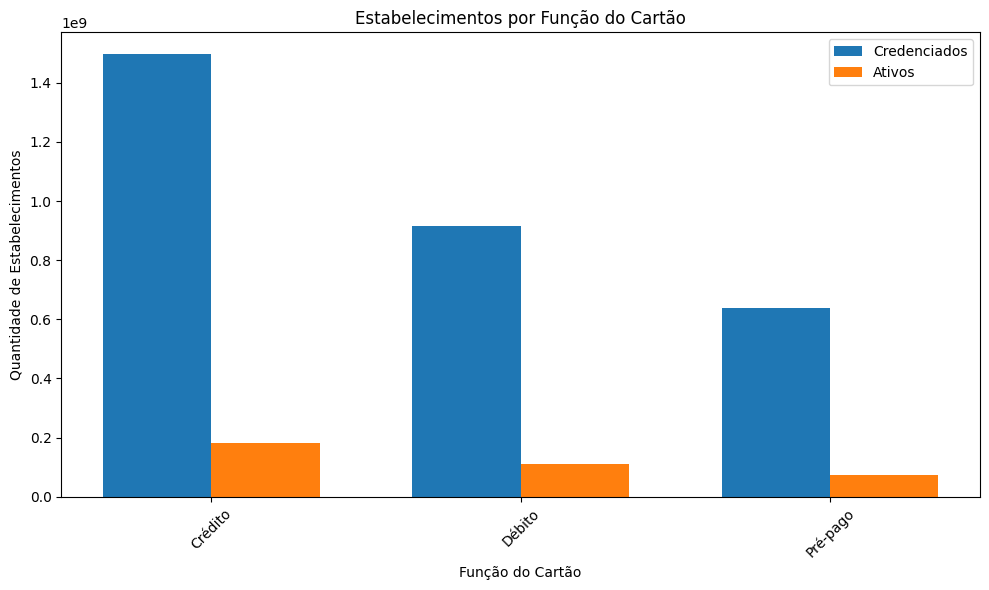

In [11]:
# Agrupando dados por função do cartão
dados_funcao = df.groupby('funcaoCartao').agg({
    'qtdEstabCredenciados': 'sum',
    'qtdEstabAtivos': 'sum'
}).reset_index()

# Plotando o gráfico de barras
plt.figure(figsize=(10, 6))
x = range(len(dados_funcao['funcaoCartao']))
width = 0.35

plt.bar([i - width/2 for i in x], dados_funcao['qtdEstabCredenciados'], 
        width, label='Credenciados')
plt.bar([i + width/2 for i in x], dados_funcao['qtdEstabAtivos'], 
        width, label='Ativos')

plt.title('Estabelecimentos por Função do Cartão')
plt.xlabel('Função do Cartão')
plt.ylabel('Quantidade de Estabelecimentos')
plt.xticks(x, dados_funcao['funcaoCartao'], rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

## Conclusões

1. **Evolução Temporal**: [Será preenchido após execução]
2. **Distribuição por Bandeira**: [Será preenchido após execução]
3. **Função do Cartão**: [Será preenchido após execução]
4. **Tendências**: [Será preenchido após execução]